In [3]:
pip install matplotlib

In [4]:
pip install pandas

In [5]:
pip install stats

In [6]:
pip install more-itertools

In [7]:
pip install seaborn

In [8]:
pip install numpy

In [9]:
pip install scikit-lego

In [10]:
pip install scikit-mlm

  Using cached https://files.pythonhosted.org/packages/03/df/4beec31e0d421ee4daffc7838ca262b4811340acca83b689f4020f180e1f/scikit-mlm-0.1.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/cc/34/64498f52ddfb0a22a22f2cfcc0b293c6864f6fcc664a53b4cce9302b59fc/fuzzy_c_means-1.2.4-py3-none-any.whl
ERROR: Could not find a version that satisfies the requirement mrsr>=0.0.3 (from scikit-mlm) (from versions: none)
ERROR: No matching distribution found for mrsr>=0.0.3 (from scikit-mlm)


In [11]:
pip install pytest-warnings

In [12]:
pip install scikit-learn

In [13]:
pip install scikit-mlm

  Using cached https://files.pythonhosted.org/packages/03/df/4beec31e0d421ee4daffc7838ca262b4811340acca83b689f4020f180e1f/scikit-mlm-0.1.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/cc/34/64498f52ddfb0a22a22f2cfcc0b293c6864f6fcc664a53b4cce9302b59fc/fuzzy_c_means-1.2.4-py3-none-any.whl
ERROR: Could not find a version that satisfies the requirement mrsr>=0.0.3 (from scikit-mlm) (from versions: none)
ERROR: No matching distribution found for mrsr>=0.0.3 (from scikit-mlm)


In [14]:
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter

plt.style.use('bmh'); sns.set()

In [15]:
#input data jual rumah di kota Depok
rumah = pd.read_csv('https://raw.githubusercontent.com/Estich85/DataMining-Kingdom-Kelompok13/main/depok.csv')

In [16]:
# Tipe Datanya : DataFrame (df)
print(type(rumah))
# Ukuran Data
N, P = rumah.shape
'baris = ', N, ', Kolom = ', P


<class 'pandas.core.frame.DataFrame'>


('baris = ', 100, ', Kolom = ', 18)

In [17]:
rumah.head()

,No,Tgl_Iklan,url,Harga_Juta,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi,Unnamed: 17
0,1,07-06-17,https://www.rumah123.com/properti/depok/hos290...,12000.0,DEPOK,975,800,6,5,1,1,2,1,11000,SHM,RUMAH CANTIK ASRI,"LOKASI SANGAT STRATEGIS DEKAT PONDOK INDAH, TO...",NaN
1,2,06-01-21,https://www.rumah.com/listing-properti/dijual-...,5500.0,DEPOK,482,300,4,4,0,0,4,0,2200,SHM,GRAND MATOA,"RUMAH DI GRAND MATOA, SIAP HUNI, BAGUS LOKASI ...",NaN
2,3,08-03-21,https://www.rumah123.com/properti/depok/hos770...,500.0,DEPOK,120,45,2,1,0,0,0,0,1300,SHM,RUMAH MURAH BISA KPR DEPELOVER CICILAN FLAT,RUMAH MURAH TERSEDIA TIPE 45/120 HARGA CASH 500JT,NaN
3,4,10-03-21,https://www.rumah123.com/properti/depok/hos748...,975.0,DEPOK,72,105,3,4,0,0,1,0,2200,SHM,"RUMAH CANTIK DAN ASRI JAMINAN DEKAT TOL, MALL,...",DIJUAL RUMAH 2 LANTAI DI LOKASI STRATEGIS DEKA...,NaN
4,5,12-03-21,https://www.rumah123.com/properti/depok/hos516...,645.0,DEPOK,70,42,2,1,0,0,0,0,1300,SHM,RUMAH SIAP HUNI DEPOK NUANSA BALI LOKASI PINGG...,RUMAH SIAP HUNI CANTIK BERNUANSA BALI,NaN


In [18]:
rumah.tail()

,No,Tgl_Iklan,url,Harga_Juta,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi,Unnamed: 17
95,96,07-04-21,https://www.rumah123.com/properti/depok/hos813...,900.0,DEPOK,112,55,3,2,0,0,1,0,2200,SHM,11 MENIT ALUN-ALUN DEPOK! RUMAH BARU DI CILODO...,"THE GREEN UBUD, RUMAH MEWAH DENGAN NUANSA BALI...",NaN
96,97,07-04-21,https://www.rumah123.com/properti/depok/hos813...,2900.0,DEPOK,216,300,4,3,2,1,1,1,2200,"PPJB,Girik,Adat",RUMAH SIAP HUNI DI CINERE DEPOK,"DATA : LT 216/LB 300, HADAP SELATAN, 2LANTAI, ...",NaN
97,98,07-04-21,https://www.rumah123.com/properti/depok/hos813...,1900.0,DEPOK,93,90,3,2,0,0,2,0,2200,SHM,RUMAH CANTIK 2 LANTAI DI RANGKAPAN JAYA-DEPOK,RUMAH CANTIK DALAM CLUSTER 2 LT DI RANGKAPAN J...,NaN
98,99,07-04-21,https://www.rumah123.com/properti/depok/hos813...,1500.0,DEPOK,110,220,4,4,0,0,2,0,2200,SHM,SISA 1 UNIT SAJA !! RUMAH 2 LANTAI TYPE 220/11...,"* SPESIFIKASI : L. TANAH : 110 M2, L. BANGUNAN...",NaN
99,100,10-04-21,https://www.rumah123.com/properti/depok/hos768...,700.2,DEPOK,74,65,3,2,0,0,1,0,2200,SHM,RUMAH MINIMALIS DEKAT TOL SAWANGAN 4,AKSES MERUPAKAN KEBUTUHAN UTAMA DLM AKTIFITAS ...,NaN


In [19]:
rumah.sample(10)

,No,Tgl_Iklan,url,Harga_Juta,Kota,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi,Unnamed: 17
16,17,26-03-21,https://www.rumah123.com/properti/depok/hos807...,624.8,DEPOK,85,48,2,1,0,0,0,0,1300,SHM,KPR MUDAH: CLUSTER DAHAN SANTIKA AKSES TOL EXI...,MARI SEMPATKAN WAKTU UNTUK MENGUNJUNGI LOKASI ...,NaN
81,82,06-04-21,https://www.rumah.com/listing-properti/dijual-...,715.0,DEPOK,75,86,3,2,0,0,1,1,1300,SHM,JUAL CEPAT RUMAH BARU 2 LANTAI BEDAHAN SAWANGA...,JUAL CEPAT RUMAH BARU 2 LANTAI DI BEDAHAN SAWA...,NaN
10,11,19-03-21,rumah123.com/properti/depok/hos6343024/,1250.0,DEPOK,84,114,3,0,1,1,0,0,2200,SHM,RUMAH CLUSTER MEWAH DAN LOKASI STRATEGIS DI PA...,LISTING INI MERUPAKAN VERIFIED LISTING 99 GROU...,NaN
89,90,07-04-21,https://www.rumah.com/listing-properti/dijual-...,685.0,DEPOK,63,100,3,2,0,0,1,0,1300,SHM,CASH ONLY^ RUMAH IDAMAN 2021 STRATEGIS 10MENIT...,RUMAH IDAMAN 2021 WHITEHOUSE PREMIERE (JLN. SE...,NaN
93,94,07-04-21,https://www.rumah123.com/properti/depok/hos813...,510.0,DEPOK,60,48,2,1,0,0,1,0,1300,SHM,RUMAH READY STOCK 1 LTI LAST UNIT CASH R KPR,"FOR SALE AT RANGKAPAN JAYA BARU RAWA DENOK ,PA...",NaN
63,64,06-04-21,https://www.rumah123.com/properti/depok/hos813...,900.0,DEPOK,112,55,3,2,0,0,1,0,2200,SHM,RUMAH CILODONG 14 MENIT KANTOR BPN! FREE KULKA...,"THE GREEN UBUD , RUMAH MEWAH DENGAN NUANSA BAL...",NaN
57,58,06-04-21,https://www.rumah123.com/properti/depok/hos812...,990.0,DEPOK,86,97,3,3,0,0,1,0,2200,SHM,CLUSTER 2 LANTAI TERMURAH DI DEPOK,RUMAH 2 LANTAI DI DEPOK,"Kualitas Bangunan Perumahan Terjamin, Legalita..."
87,88,07-04-21,rumah.com/listing-properti/dijual-duren-lantab...,1850.0,DEPOK,78,110,4,4,0,0,2,0,1300,SHM,DUREN LANTABUR RESIDENCE,RUMAH MEWAH HARGA MURAH DI LOKASI STRATEGIS DE...,NaN
26,27,31-03-21,https://www.rumah123.com/properti/depok/hos780...,816.0,DEPOK,58,71,3,2,0,0,0,0,2200,SHM,RUMAH KUKUSAN BEJI DEPOK 3 LANTAI ROOFTOP DEKA...,"INFO: UNTUK RESPON LEBIH CEPAT, BISA HUBUNGI K...",NaN
21,22,29-03-21,https://www.rumah123.com/properti/depok/hos780...,548.0,DEPOK,60,54,3,2,3,2,0,0,2200,SHM,PROMO DP 0 FREE BIAYA RUMAH MURAH STRATEGIS 2 ...,HUNIAN CLUSTER PERUMAHAN TERBARU DI TENGAH DEP...,NaN


In [20]:
#untuk melihat semua kolom nya
rumah.columns

Index(['No', 'Tgl_Iklan', 'url', 'Harga_Juta', 'Kota', 'LT', 'LB', 'KT', 'KM',
       'KTP', 'KMP', 'Carport', 'Garasi', 'Listrik', 'Surat', 'Judul',
       'Deskripsi', 'Unnamed: 17'],
      dtype='object')

In [21]:
#karena kolom No hanya untuk menomori data maka akan di remove
rumah.drop("No", axis=1, inplace=True)

In [22]:
#karena kolom Kota datanya seragam maka akan di remove
rumah.drop("Kota", axis=1, inplace=True)

In [23]:
rumah.drop("Unnamed: 17", axis=1, inplace=True)

In [24]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tgl_Iklan   100 non-null    object 
 1   url         100 non-null    object 
 2   Harga_Juta  100 non-null    float64
 3   LT          100 non-null    int64  
 4   LB          100 non-null    int64  
 5   KT          100 non-null    int64  
 6   KM          100 non-null    int64  
 7   KTP         100 non-null    int64  
 8   KMP         100 non-null    int64  
 9   Carport     100 non-null    int64  
 10  Garasi      100 non-null    int64  
 11  Listrik     100 non-null    int64  
 12  Surat       100 non-null    object 
 13  Judul       100 non-null    object 
 14  Deskripsi   100 non-null    object 
dtypes: float64(1), int64(9), object(5)
memory usage: 11.8+ KB


In [25]:
rumah['Tgl_Iklan']=rumah['Tgl_Iklan'].astype('category')
rumah['url']=rumah['url'].astype('category')
rumah['Surat']=rumah['Surat'].astype('category')
rumah['Judul']=rumah['Judul'].astype('category')
rumah['Deskripsi']=rumah['Deskripsi'].astype('category')
rumah.dtypes

Tgl_Iklan     category
url           category
Harga_Juta     float64
LT               int64
LB               int64
KT               int64
KM               int64
KTP              int64
KMP              int64
Carport          int64
Garasi           int64
Listrik          int64
Surat         category
Judul         category
Deskripsi     category
dtype: object

In [26]:
#mengecek ada atau tidaknya duplikat data
print(rumah.shape)
rumah.duplicated().sum()

(100, 15)


0

In [27]:
#memilih variabel dengan tipe tertentu
rumah_num = rumah.select_dtypes(include=["float64", "int64"])
rumah_num.head() #sehingga rumah_num adalah variabel baru

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
0,12000.0,975,800,6,5,1,1,2,1,11000
1,5500.0,482,300,4,4,0,0,4,0,2200
2,500.0,120,45,2,1,0,0,0,0,1300
3,975.0,72,105,3,4,0,0,1,0,2200
4,645.0,70,42,2,1,0,0,0,0,1300


In [28]:
#memilih variabel dengan tipe tertentu
rumah_cat = rumah.select_dtypes(include=['category'])
rumah_cat.head()

,Tgl_Iklan,url,Surat,Judul,Deskripsi
0,07-06-17,https://www.rumah123.com/properti/depok/hos290...,SHM,RUMAH CANTIK ASRI,"LOKASI SANGAT STRATEGIS DEKAT PONDOK INDAH, TO..."
1,06-01-21,https://www.rumah.com/listing-properti/dijual-...,SHM,GRAND MATOA,"RUMAH DI GRAND MATOA, SIAP HUNI, BAGUS LOKASI ..."
2,08-03-21,https://www.rumah123.com/properti/depok/hos770...,SHM,RUMAH MURAH BISA KPR DEPELOVER CICILAN FLAT,RUMAH MURAH TERSEDIA TIPE 45/120 HARGA CASH 500JT
3,10-03-21,https://www.rumah123.com/properti/depok/hos748...,SHM,"RUMAH CANTIK DAN ASRI JAMINAN DEKAT TOL, MALL,...",DIJUAL RUMAH 2 LANTAI DI LOKASI STRATEGIS DEKA...
4,12-03-21,https://www.rumah123.com/properti/depok/hos516...,SHM,RUMAH SIAP HUNI DEPOK NUANSA BALI LOKASI PINGG...,RUMAH SIAP HUNI CANTIK BERNUANSA BALI


In [29]:
#Dasar pengolahan variable kategorik : Dummy Variable
df = pd.get_dummies(rumah["Surat"], prefix='surat')
df.head()

,surat_HGB,"surat_PPJB,Girik,Adat",surat_SHM
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [30]:
#menggabungkan dengan data awal (concat)
df2 = pd.concat([rumah, df], axis=1)
df2.head().transpose()

,0,1,2,3,4
Tgl_Iklan,07-06-17,06-01-21,08-03-21,10-03-21,12-03-21
url,https://www.rumah123.com/properti/depok/hos290...,https://www.rumah.com/listing-properti/dijual-...,https://www.rumah123.com/properti/depok/hos770...,https://www.rumah123.com/properti/depok/hos748...,https://www.rumah123.com/properti/depok/hos516...
Harga_Juta,12000,5500,500,975,645
LT,975,482,120,72,70
LB,800,300,45,105,42
KT,6,4,2,3,2
KM,5,4,1,4,1
KTP,1,0,0,0,0
KMP,1,0,0,0,0
Carport,2,4,0,1,0


In [31]:
# memilih data secara manual
x = rumah[['Harga_Juta','LT']]
x[:7]

,Harga_Juta,LT
0,12000.0,975
1,5500.0,482
2,500.0,120
3,975.0,72
4,645.0,70
5,1025.0,63
6,485.0,61


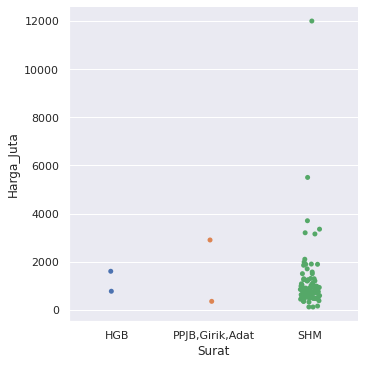

In [32]:
p = sns.catplot(x="Surat", y="Harga_Juta", data=rumah)

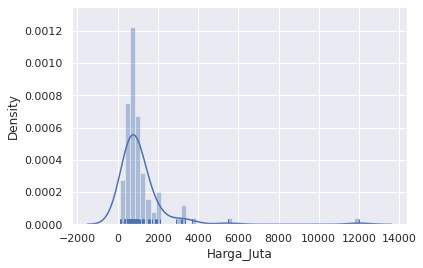

In [33]:
q = sns.distplot(rumah['Harga_Juta'], kde=True, rug=True)

In [34]:
#Misal dengan asumsi data berdistribusi normal 
#dan menggunakan confidence interval 95% disekitar variabel harga rumah
df3 = np.abs(rumah.Harga_Juta - rumah.Harga_Juta.mean())<=(2*rumah.Harga_Juta.std())
# mu-2s<x<mu+2s
print(df3.shape)
df3.head()

(100,)


0    False
1    False
2     True
3     True
4     True
Name: Harga_Juta, dtype: bool

# Menghilangkan Outlier

In [35]:
rumah2 = rumah[df3] # Data tanpa outliers
print(rumah2.shape, rumah.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya 
# disimpan dalam variabel baru "rumah2"
# Jika datanya besar hati-hati melakukan hal ini

(98, 15) (100, 15)


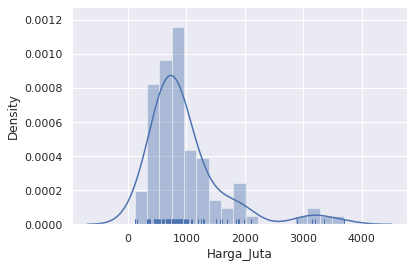

In [36]:
r = sns.distplot(rumah2['Harga_Juta'], kde=True, rug=True)

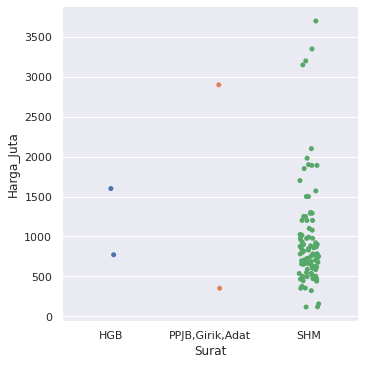

In [37]:
p = sns.catplot(x="Surat", y="Harga_Juta", data=rumah2)

# Melihat Missing Value

In [38]:
print(rumah2.isnull().sum())

Tgl_Iklan     0
url           0
Harga_Juta    0
LT            0
LB            0
KT            0
KM            0
KTP           0
KMP           0
Carport       0
Garasi        0
Listrik       0
Surat         0
Judul         0
Deskripsi     0
dtype: int64


In [39]:
set(rumah2['Surat'])

{'HGB', 'PPJB,Girik,Adat', 'SHM'}

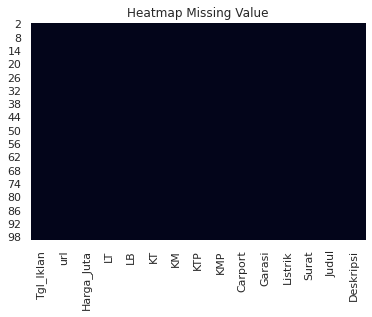

In [40]:
sns.heatmap(rumah2.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [41]:
(rumah2.isnull().sum()/len(rumah2)).to_frame('persentase missing')

,persentase missing
Tgl_Iklan,0.0
url,0.0
Harga_Juta,0.0
LT,0.0
LB,0.0
KT,0.0
KM,0.0
KTP,0.0
KMP,0.0
Carport,0.0


Setelah dilakukan penghapusan missing value, baris data yang awalnya berjumlah 100 menjadi 98 baris data.

In [42]:
# Ukuran Data
N, P = rumah2.shape
'baris = ', N, ', Kolom = ', P

('baris = ', 98, ', Kolom = ', 15)

# Statistika Deskriptif

In [43]:
rumah2.describe()

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,984.929082,97.918367,88.367347,2.897959,2.051020,0.153061,0.102041,0.816327,0.153061,1964.285714
std,676.029741,64.058233,61.960810,1.439429,1.620567,0.483800,0.336440,0.841537,0.414978,1110.980806
min,114.900000,40.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,604.250000,70.000000,48.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
50%,808.000000,78.000000,69.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
75%,1094.500000,102.000000,100.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
max,3700.000000,515.000000,380.000000,15.000000,15.000000,3.000000,2.000000,5.000000,2.000000,10000.000000


In [44]:
#statistik sederhana seluruh datanya
rumah2.describe(include='all')

,Tgl_Iklan,url,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat,Judul,Deskripsi
count,98,98,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98,98,98
unique,20,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,96,87
top,06-04-21,https://www.rumah123.com/properti/depok/hos813...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SHM,DUREN LANTABUR RESIDENCE,"INFO: UNTUK RESPON LEBIH CEPAT, BISA HUBUNGI K..."
freq,33,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,2,10
mean,NaN,NaN,984.929082,97.918367,88.367347,2.897959,2.051020,0.153061,0.102041,0.816327,0.153061,1964.285714,NaN,NaN,NaN
std,NaN,NaN,676.029741,64.058233,61.960810,1.439429,1.620567,0.483800,0.336440,0.841537,0.414978,1110.980806,NaN,NaN,NaN
min,NaN,NaN,114.900000,40.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,604.250000,70.000000,48.500000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,NaN,NaN,NaN
50%,NaN,NaN,808.000000,78.000000,69.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,NaN,NaN,NaN
75%,NaN,NaN,1094.500000,102.000000,100.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000,NaN,NaN,NaN


# Visualisasi Data

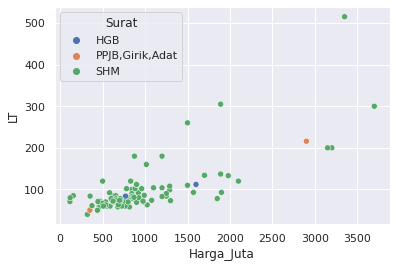

In [45]:
#Scatter Plot 
p = sns.scatterplot(x=rumah2['Harga_Juta'], y=rumah2['LT'], hue = rumah2['Surat'])

# Apakah ada kecenderungan perbedaan harga rumah akibat dari jumlah kamar tidur dan kamar mandi?

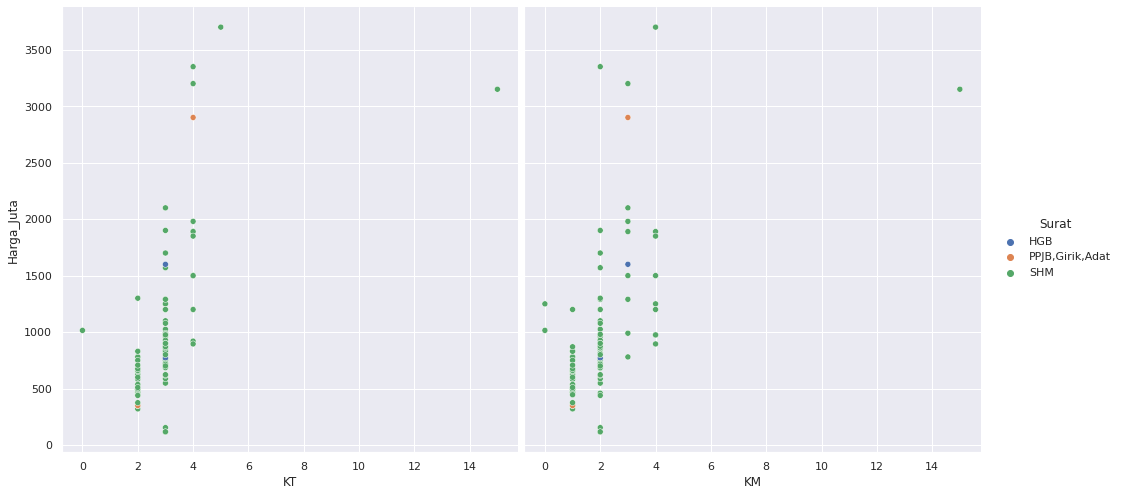

In [46]:
p = sns.pairplot(rumah2, x_vars =['KT', 'KM'], y_vars = ['Harga_Juta'], hue="Surat", height= 7)

Terdapat kecenderungan perbedaan harga rumah. Tetapi, tidak adanya kecenderungan antara kamar tidur dan kamar mandi terhadap harga rumah.



# Apakah ada kecenderungan perbedaan harga rumah akibat dari tipe parkir?

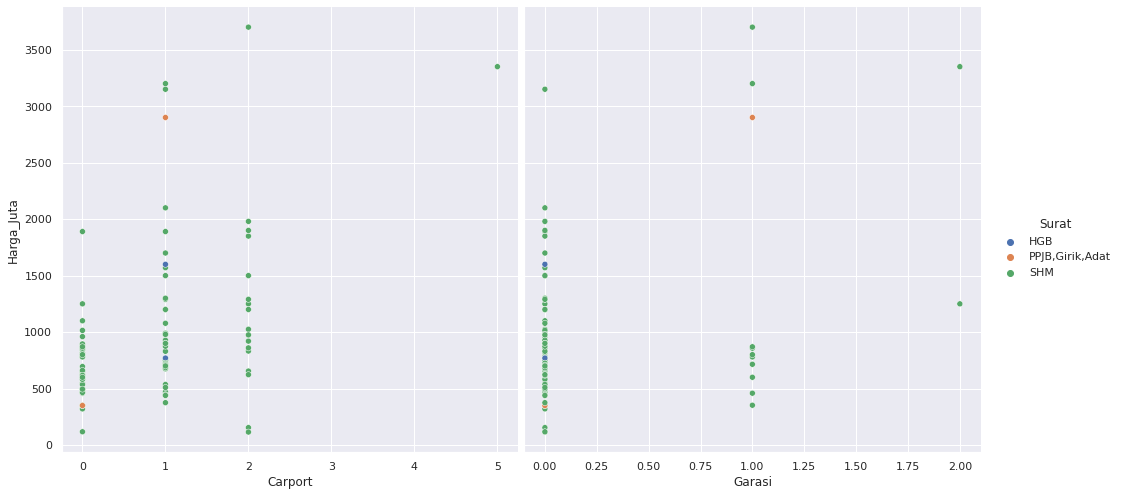

In [47]:
p = sns.pairplot(rumah2, x_vars =['Carport', 'Garasi'], y_vars = ['Harga_Juta'], hue="Surat", height= 7)

Berdasarkan grafik di atas, rumah yang dijual di Depok rata-rata memiliki 1 carport dan tidak memiliki garasi. Dapat dilihat juga bahwa carport dan garasi tidak memengaruhi harga rumah.

# Apakah ada kecenderungan perbedaan harga rumah akibat dari luas tanah dan luas bangunan?

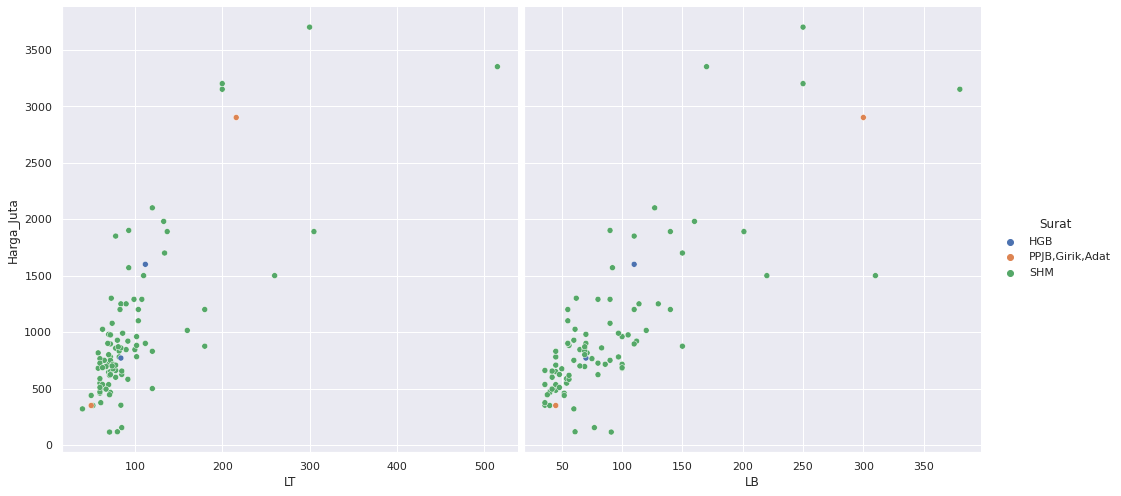

In [48]:
p = sns.pairplot(rumah2, x_vars =['LT', 'LB'], y_vars = ['Harga_Juta'], hue="Surat", height= 7)

Dilihat dari grafik di atas terlihat adanya kecenderungan harga rumah yang dipengaruhi oleh luas bangunan.

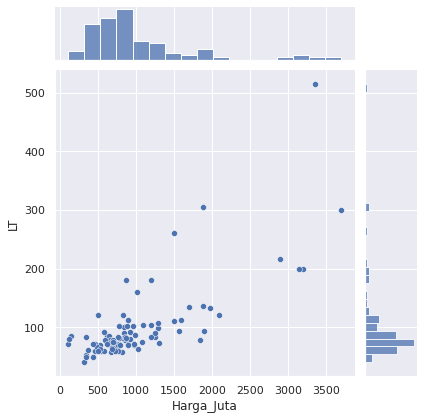

In [49]:
#Joint Plot Variabel Harga_Juta dengan variabel LT
p = sns.jointplot(x=rumah2['Harga_Juta'], y=rumah2['LT'])

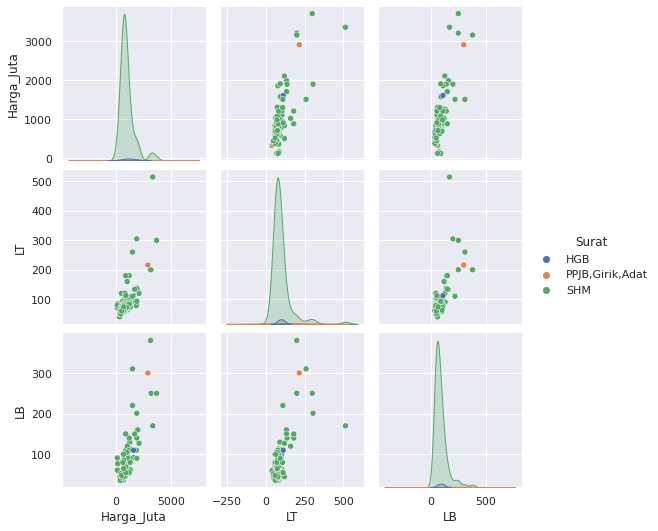

In [50]:
p = sns.pairplot(rumah2[['Harga_Juta','LT','LB','Surat']], hue="Surat")

# Memeriksa Korelasi

In [51]:
rumah2.corr()

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
Harga_Juta,1.000000,0.758460,0.804063,0.594369,0.557029,0.477541,0.387395,0.452709,0.354994,0.147883
LT,0.758460,1.000000,0.670213,0.371103,0.292703,0.381291,0.335714,0.461565,0.413113,0.223651
LB,0.804063,0.670213,1.000000,0.720320,0.700843,0.377438,0.289469,0.347110,0.217509,0.110763
KT,0.594369,0.371103,0.720320,1.000000,0.930346,0.126285,0.085586,0.248200,0.060934,-0.008104
KM,0.557029,0.292703,0.700843,0.930346,1.000000,0.068831,0.009261,0.248844,0.049587,-0.043068
KTP,0.477541,0.381291,0.377438,0.126285,0.068831,1.000000,0.853106,0.120406,0.241553,0.113849
KMP,0.387395,0.335714,0.289469,0.085586,0.009261,0.853106,1.000000,0.103292,0.182341,0.131208
Carport,0.452709,0.461565,0.347110,0.248200,0.248844,0.120406,0.103292,1.000000,0.199417,0.253143
Garasi,0.354994,0.413113,0.217509,0.060934,0.049587,0.241553,0.182341,0.199417,1.000000,0.076827
Listrik,0.147883,0.223651,0.110763,-0.008104,-0.043068,0.113849,0.131208,0.253143,0.076827,1.000000


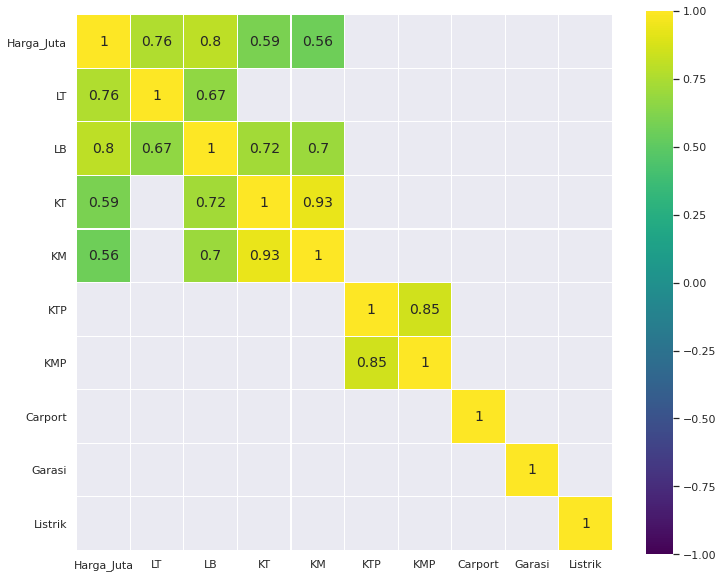

In [52]:
corr2 = rumah2.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Kesimpulan

Dari 100 data iklan penjualan rumah di Kota Depok, ditemukan 2 data yang merupakan outlier, lalu kami me-remove outlier tersebut. Sehingga data yang diobservasi tersisa 98 data. Dari 98 data tersebut, tidak terdapat missing value. Untuk melihat keragaman data, kami melakukan Stastistika Deskriptif. Kami ingin mengetahui hubungan antara variabel antara 'Harga_juta' dan variabel 'Luas_Tanah' dengan melibatkan variabel 'Surat', berdasarkan hasil visualisasi dengan menggunakan scatterplot diperoleh kesimpulan titik-titik pola garis lurus dari kiri bawah ke kanan atas. Hal ini menunjukkan bahwa ada linear dan positif antara variabel Harga rumah (Harga_Juta) dengan variabel Luas Tanah (LT). Hubungan posistif ini berarti jika semakin tinggi Harga Rumah (x), maka semakin besar juga Luas Tanah (y) yang dijual, dan dari plot diatas rata-rata surat yang digunakan berupa Sertifikat Hak Milik (SHM). Berdasarkan tabel korelasi antarvariabel, diperoleh bahwa variabel 'Harga_juta' dengan 'LB' memiliki korelasi terbesar yaitu 0.8.

Untuk itu kami merekomendasikan untuk penjual rumah, yaitu: Dikarenakan korelasi yang tinggi antara variabel 'Harga_juta' dengan 'LB', kami merekomendasikan untuk menjual rumah dengan harga yang lebih tinggi jika luas bangunan nya lebih besar.

# Clustering

In [53]:
# Run this cell ONLY if this notebook run from Google Colab
# Kalau dijalankan lokal (Anaconda/WinPython) maka silahkan install di terminal/command prompt 
# Lalu unduh secara manual file yang dibutuhkan dan letakkan di folder Python anda.
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

Requirement already up-to-date: umap-learn in /usr/local/lib/python3.7/dist-packages (0.5.1)
--2021-04-20 07:49:07--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.8’

tau_unsup.py.8      100%[===================>]  16.98K  --.-KB/s    in 0.001s  

2021-04-20 07:49:07 (11.6 MB/s) - ‘tau_unsup.py.8’ saved [17387/17387]



In [54]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import umap, numpy as np, tau_unsup as tau, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from sklearn import cluster, datasets
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI 

sns.set(style="ticks", color_codes=True)

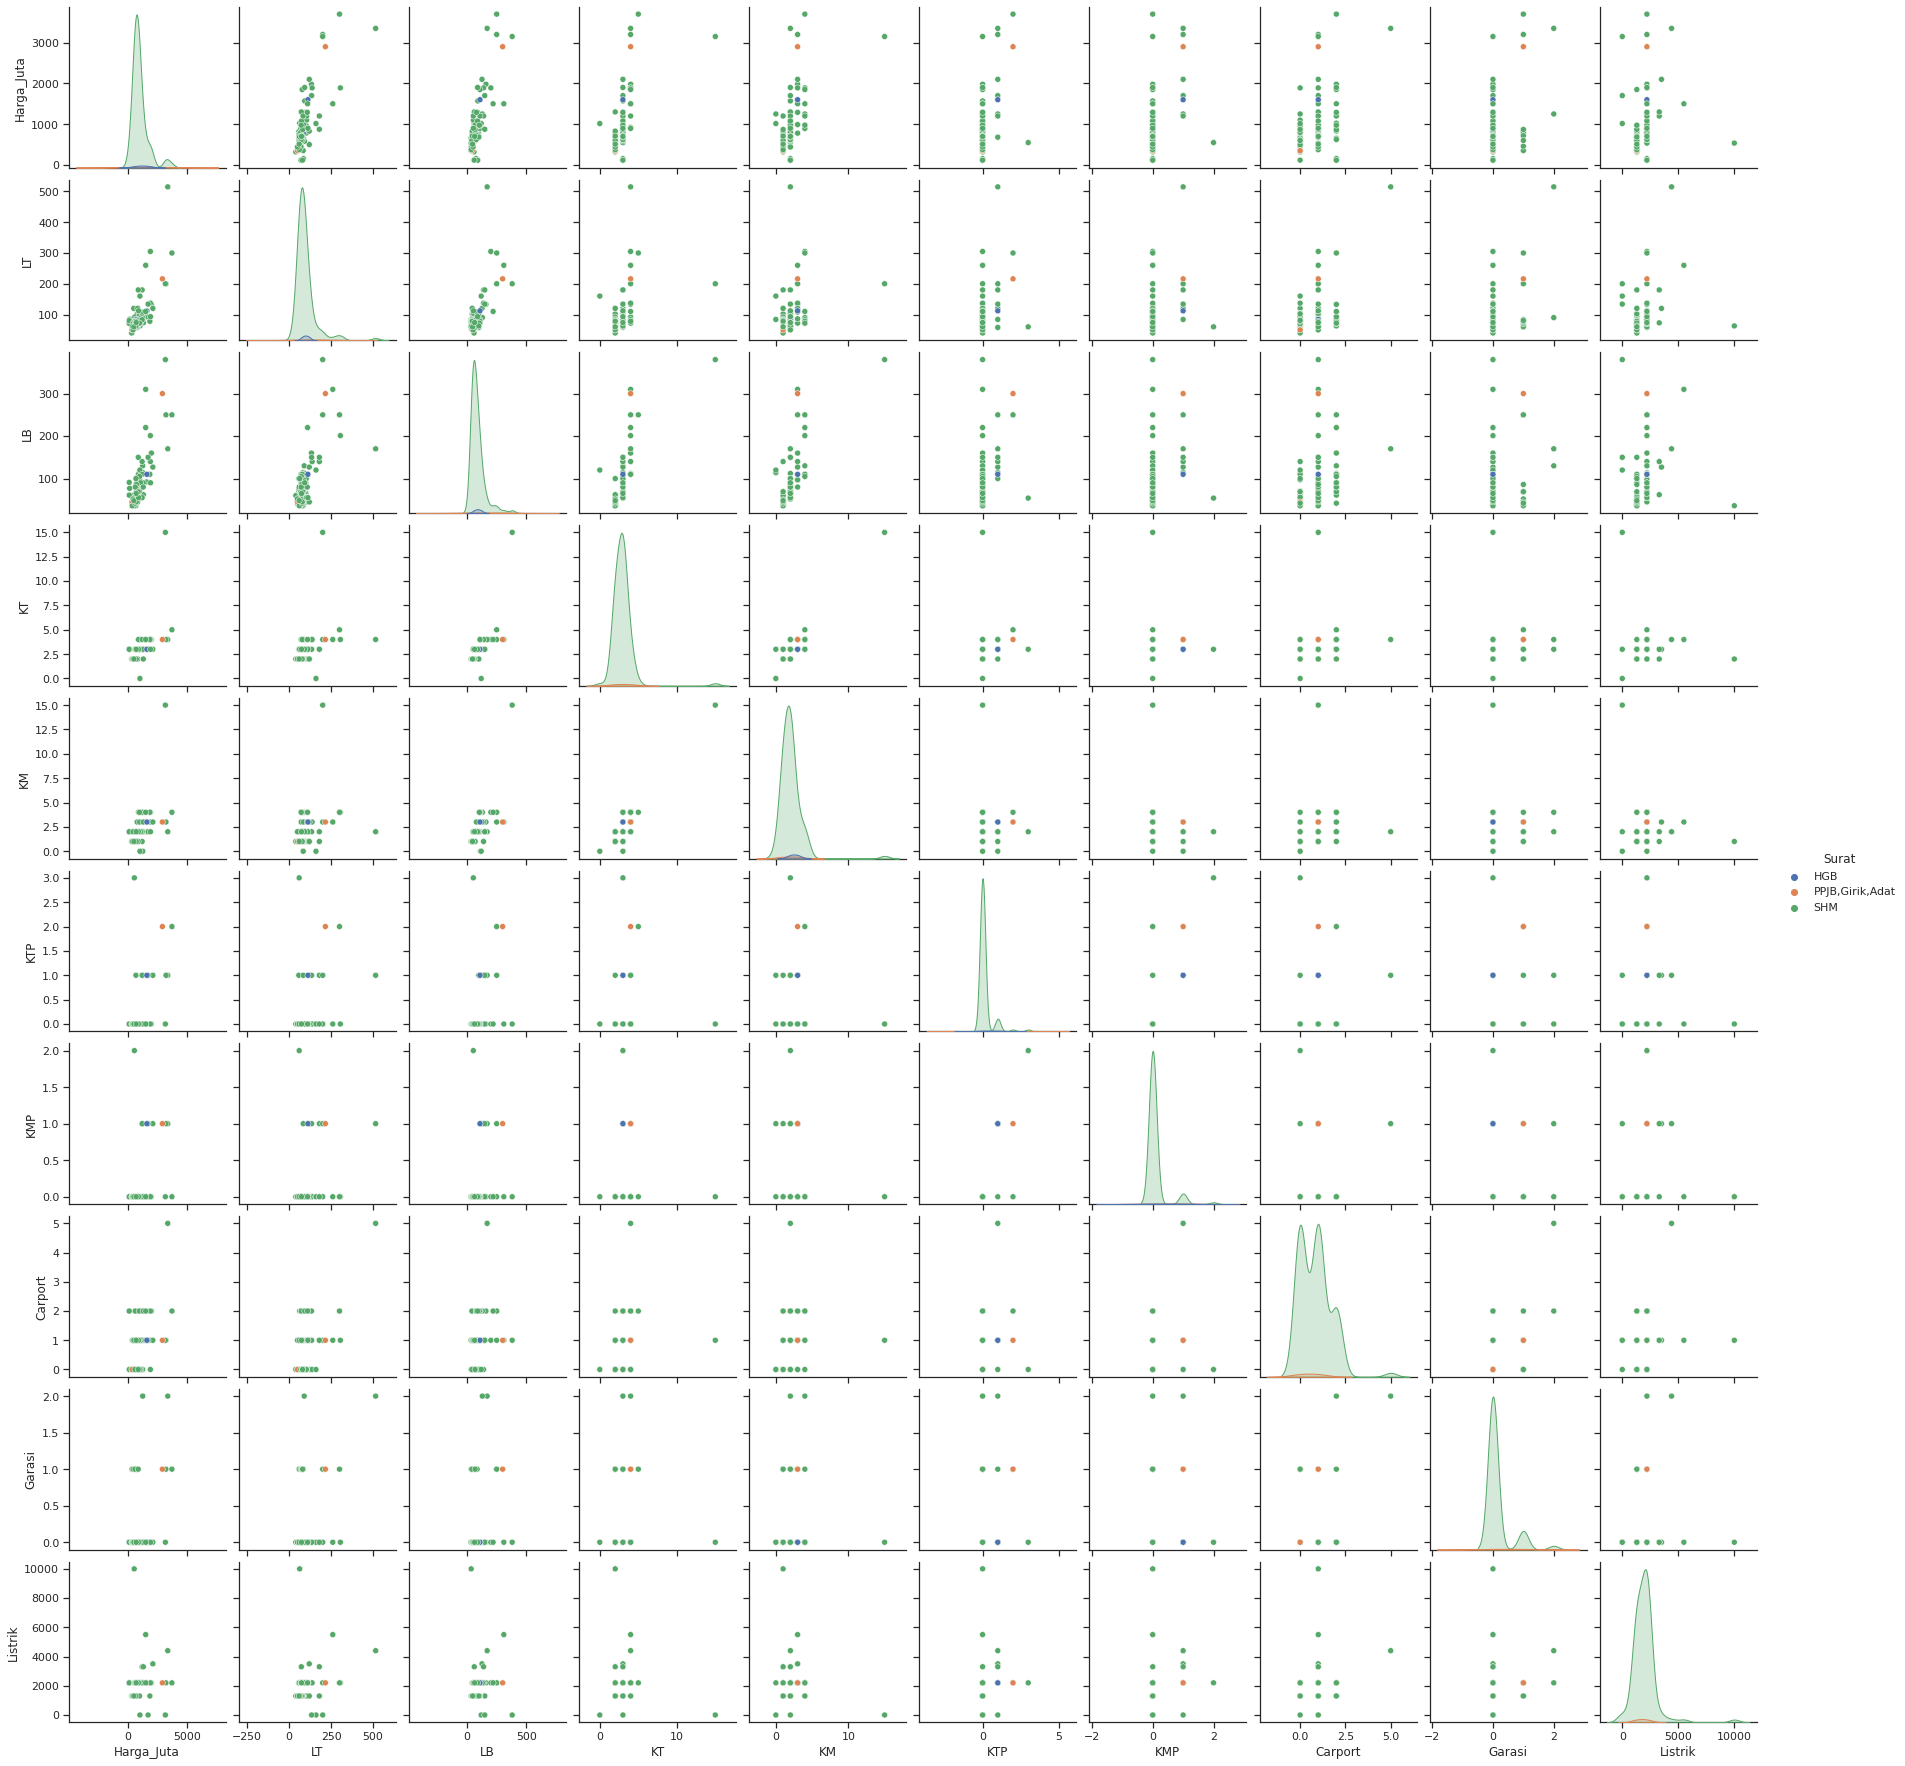

In [55]:
g = sns.pairplot(rumah2, hue="Surat")

In [56]:
rumah2.drop(['Tgl_Iklan','url','Judul','Deskripsi'], axis=1, inplace=True)
rumah2.head()

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik,Surat
2,500.0,120,45,2,1,0,0,0,0,1300,SHM
3,975.0,72,105,3,4,0,0,1,0,2200,SHM
4,645.0,70,42,2,1,0,0,0,0,1300,SHM
5,1025.0,63,61,3,2,0,0,2,0,2200,SHM
6,485.0,61,45,2,1,0,0,0,0,1300,SHM


In [57]:
#Scaling Data

In [58]:
from sklearn import preprocessing

In [59]:
minmax=preprocessing.MinMaxScaler().fit_transform(rumah2.drop('Surat', axis=1))

In [60]:
df4 = pd.DataFrame(minmax, index=rumah2.index, columns=rumah2.columns[:-1])

In [61]:
df4

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
2,0.107417,0.168421,0.026163,0.133333,0.066667,0.000000,0.0,0.0,0.0,0.13
3,0.239910,0.067368,0.200581,0.200000,0.266667,0.000000,0.0,0.2,0.0,0.22
4,0.147862,0.063158,0.017442,0.133333,0.066667,0.000000,0.0,0.0,0.0,0.13
5,0.253856,0.048421,0.072674,0.200000,0.133333,0.000000,0.0,0.4,0.0,0.22
6,0.103233,0.044211,0.026163,0.133333,0.066667,0.000000,0.0,0.0,0.0,0.13
...,...,...,...,...,...,...,...,...,...,...
95,0.218990,0.151579,0.055233,0.200000,0.133333,0.000000,0.0,0.2,0.0,0.22
96,0.776854,0.370526,0.767442,0.266667,0.200000,0.666667,0.5,0.2,0.5,0.22
97,0.497922,0.111579,0.156977,0.200000,0.133333,0.000000,0.0,0.4,0.0,0.22
98,0.386349,0.147368,0.534884,0.266667,0.266667,0.000000,0.0,0.4,0.0,0.22


In [62]:
df4.head()

,Harga_Juta,LT,LB,KT,KM,KTP,KMP,Carport,Garasi,Listrik
2,0.107417,0.168421,0.026163,0.133333,0.066667,0.0,0.0,0.0,0.0,0.13
3,0.239910,0.067368,0.200581,0.200000,0.266667,0.0,0.0,0.2,0.0,0.22
4,0.147862,0.063158,0.017442,0.133333,0.066667,0.0,0.0,0.0,0.0,0.13
5,0.253856,0.048421,0.072674,0.200000,0.133333,0.0,0.0,0.4,0.0,0.22
6,0.103233,0.044211,0.026163,0.133333,0.066667,0.0,0.0,0.0,0.0,0.13


In [63]:
c_data = np.array(df4)
c_data[:5]

array([[0.10741681, 0.16842105, 0.02616279, 0.13333333, 0.06666667,
        0.        , 0.        , 0.        , 0.        , 0.13      ],
       [0.23990963, 0.06736842, 0.2005814 , 0.2       , 0.26666667,
        0.        , 0.        , 0.2       , 0.        , 0.22      ],
       [0.14786198, 0.06315789, 0.01744186, 0.13333333, 0.06666667,
        0.        , 0.        , 0.        , 0.        , 0.13      ],
       [0.25385624, 0.04842105, 0.07267442, 0.2       , 0.13333333,
        0.        , 0.        , 0.4       , 0.        , 0.22      ],
       [0.10323282, 0.04421053, 0.02616279, 0.13333333, 0.06666667,
        0.        , 0.        , 0.        , 0.        , 0.13      ]])

In [64]:
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Elbow curve')

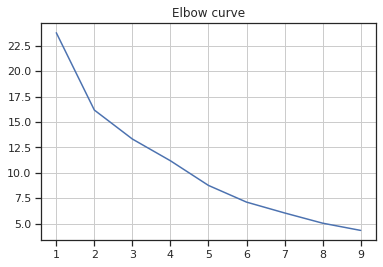

In [65]:
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(c_data)
    distorsions.append(kmeans.inertia_)
#fig=plt.figure(figsize=(10, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

# K berdasarkan Elbow Method

# K=3

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 1, 0, 0, 0], dtype=int32)

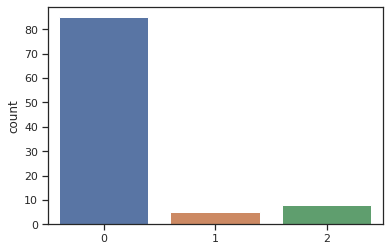

In [66]:
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 109)
km.fit(df4)
C_km = km.predict(c_data)
p = sns.countplot(C_km);
C_km

In [67]:
km.inertia_

13.493877884532322

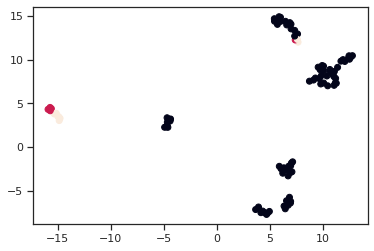

In [69]:
XD = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=109).fit_transform(df4)
fig, ax = plt.subplots()
ax.scatter(XD[:,0], XD[:,1], c=C_km)
plt.show()

# K=4

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 1, 0, 0, 0], dtype=int32)

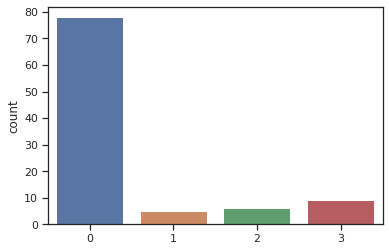

In [70]:
km1 = KMeans(n_clusters=4, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 109)
km1.fit(df4)
C_km1 = km1.predict(df4)
sns.countplot(C_km1);
C_km1

In [72]:
km1.inertia_

10.740739163522877

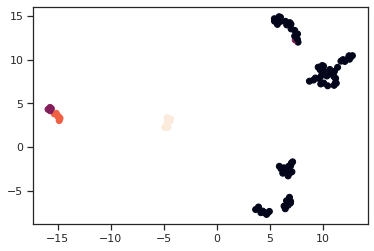

In [73]:
X1D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=109).fit_transform(df4)
fig, ax = plt.subplots()
ax.scatter(X1D[:,0], X1D[:,1], c=C_km1)
plt.show()

# K=5

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 2, 0, 0, 2, 4, 3, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 4, 2, 1, 2, 4, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 1, 2, 3, 2, 4, 2], dtype=int32)

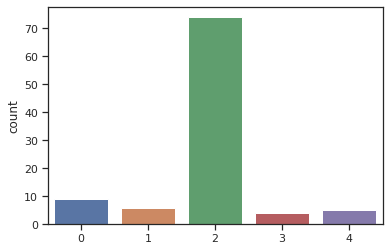

In [74]:
km2 = KMeans(n_clusters=5, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 109)
km2.fit(df4)
C_km2 = km2.predict(df4)
sns.countplot(C_km2);
C_km2

In [75]:
km2.inertia_

8.721178347166285

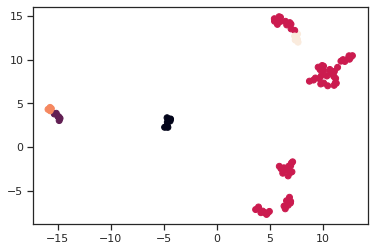

In [76]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=109).fit_transform(df4)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km2)
plt.show()

In [77]:
#Evaluasi : Internal
Hasil_Clustering = [C_km, C_km1, C_km2]
for res in Hasil_Clustering:
    print(siluet(df4,res), end=', ')

0.5084571642225268, 0.46633851256227105, 0.4862500483877286, 

Berdasarkan hasil testing di atas, nilai K yang dipilih untuk clustering adalah K = 4. Hal tersebut karena pada K = 4 memiliki inertia lebih minimum dibanding K = 3 dan K = 5.

In [78]:
km2.cluster_centers_

array([[ 1.75107466e-01,  7.90643275e-02,  8.85012920e-02,
         1.70370370e-01,  1.18518519e-01,  6.93889390e-18,
         0.00000000e+00,  6.66666667e-02,  5.55555556e-01,
         1.70000000e-01],
       [ 3.58362854e-01,  1.57894737e-01,  2.32073643e-01,
         2.00000000e-01,  1.22222222e-01,  4.44444444e-01,
         5.83333333e-01,  1.33333333e-01,  0.00000000e+00,
         2.23333333e-01],
       [ 1.87594564e-01,  8.56045519e-02,  9.67159019e-02,
         1.75675676e-01,  1.19819820e-01,  4.50450450e-03,
         4.16333634e-17,  1.54054054e-01, -6.93889390e-17,
         1.90135135e-01],
       [ 8.84940448e-01,  5.63684211e-01,  6.00290698e-01,
         2.83333333e-01,  2.00000000e-01,  5.00000000e-01,
         3.75000000e-01,  4.50000000e-01,  6.25000000e-01,
         2.75000000e-01],
       [ 5.26930908e-01,  3.40210526e-01,  6.34302326e-01,
         4.13333333e-01,  3.86666667e-01, -6.93889390e-18,
         0.00000000e+00,  2.80000000e-01, -1.38777878e-17,
         2.

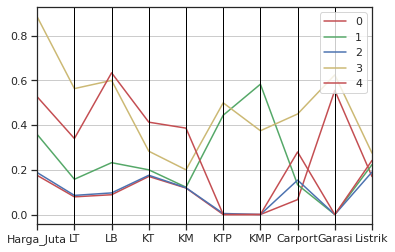

In [79]:
cols = ['Harga_Juta','LT','LB','KT','KM','KTP','KMP','Carport','Garasi','Listrik']
dfC = pd.DataFrame(km2.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b','y'))
plt.show()